# Simple Linear Regression with TensorFlow

El ejemplo mostrado abajo fue inspirado en este [video](https://www.youtube.com/watch?v=4ZWi8roTieQ&list=PLx7tvyG--lcVRj4e_k0efFibMgeOpt7bS&index=2)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Model

Here we are going to simulate data from the next model.

\begin{align*}
y_i &\sim N(\mu_i, \sigma^2), \\
\mu_i &= -2 + 3 x, \\
\sigma &= 2.5, \\
x &\sim U(-2, 2).
\end{align*}

The parameter vector is $\boldsymbol{\theta}=(-2, 3, \sigma^2=2.5^2)^\top$.

To generate the data we can use the next code:

In [2]:
n = 100
x_data = -2 + 4 * np.random.random(size=n)
media = -2 + 3 * x_data
sigma = 2.5
y_data = sigma * np.random.randn(n) + media

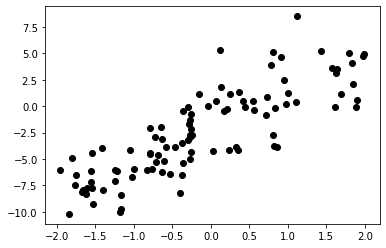

In [3]:
plt.plot(x_data, y_data, 'o', color='black');

In [4]:
# Los parámetros
W = tf.Variable([0.01], dtype=tf.float32)
b = tf.Variable([0.01], dtype=tf.float32)

# Placeholders
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# El modelo
mu_hat = W * x + b

# Función a minimizar
loss = tf.reduce_sum(tf.square(mu_hat - y))

# Informacion para el entrenamiento
op = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = op.minimize(loss)

# Inicializar las variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

feed_dict = {x: x_data, y: y_data}

In [5]:
# Entrenamiento
for i in range(1000):
    loss_ = sess.run([train, loss], feed_dict=feed_dict)

In [8]:
W_, b_, loss_ = sess.run([W, b, loss], {x: x_data, y: y_data})
print("\n Valores actuales:")
print("\t b: %s W: %s loss: %s"%(b_, W_, loss_))


 Valores actuales:
	 b: [-2.068555] W: [3.2311034] loss: 533.2573


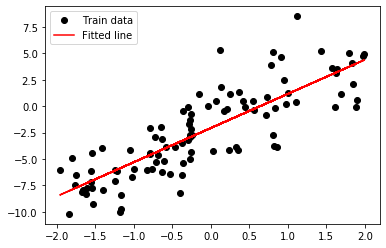

In [7]:
plt.plot(x_data, y_data, 'o', color='black', label='Train data');
plt.plot(x_data, [W_*Xi + b_ for Xi in x_data], 'r', label='Fitted line')
plt.legend()
plt.show()